<a href="https://colab.research.google.com/github/vieweghn/EENG-310-Signals-and-Systems/blob/main/EENG_310_HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import bode_plot

Here is an [example](https://colab.research.google.com/drive/1-D6TmxfN6gT1talpmfyZuKprFiN__MpW?usp=sharing) that might help with some of these problems.

A. Design a series $RLC$ bandpass filter that has half power frequencies at $1\mathrm{~kHz}$ and $10\mathrm{~kHz}$ and an input impedance at resonance of $6\mathrm{~\Omega}$.

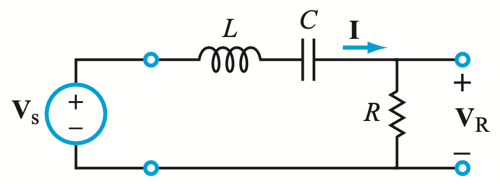

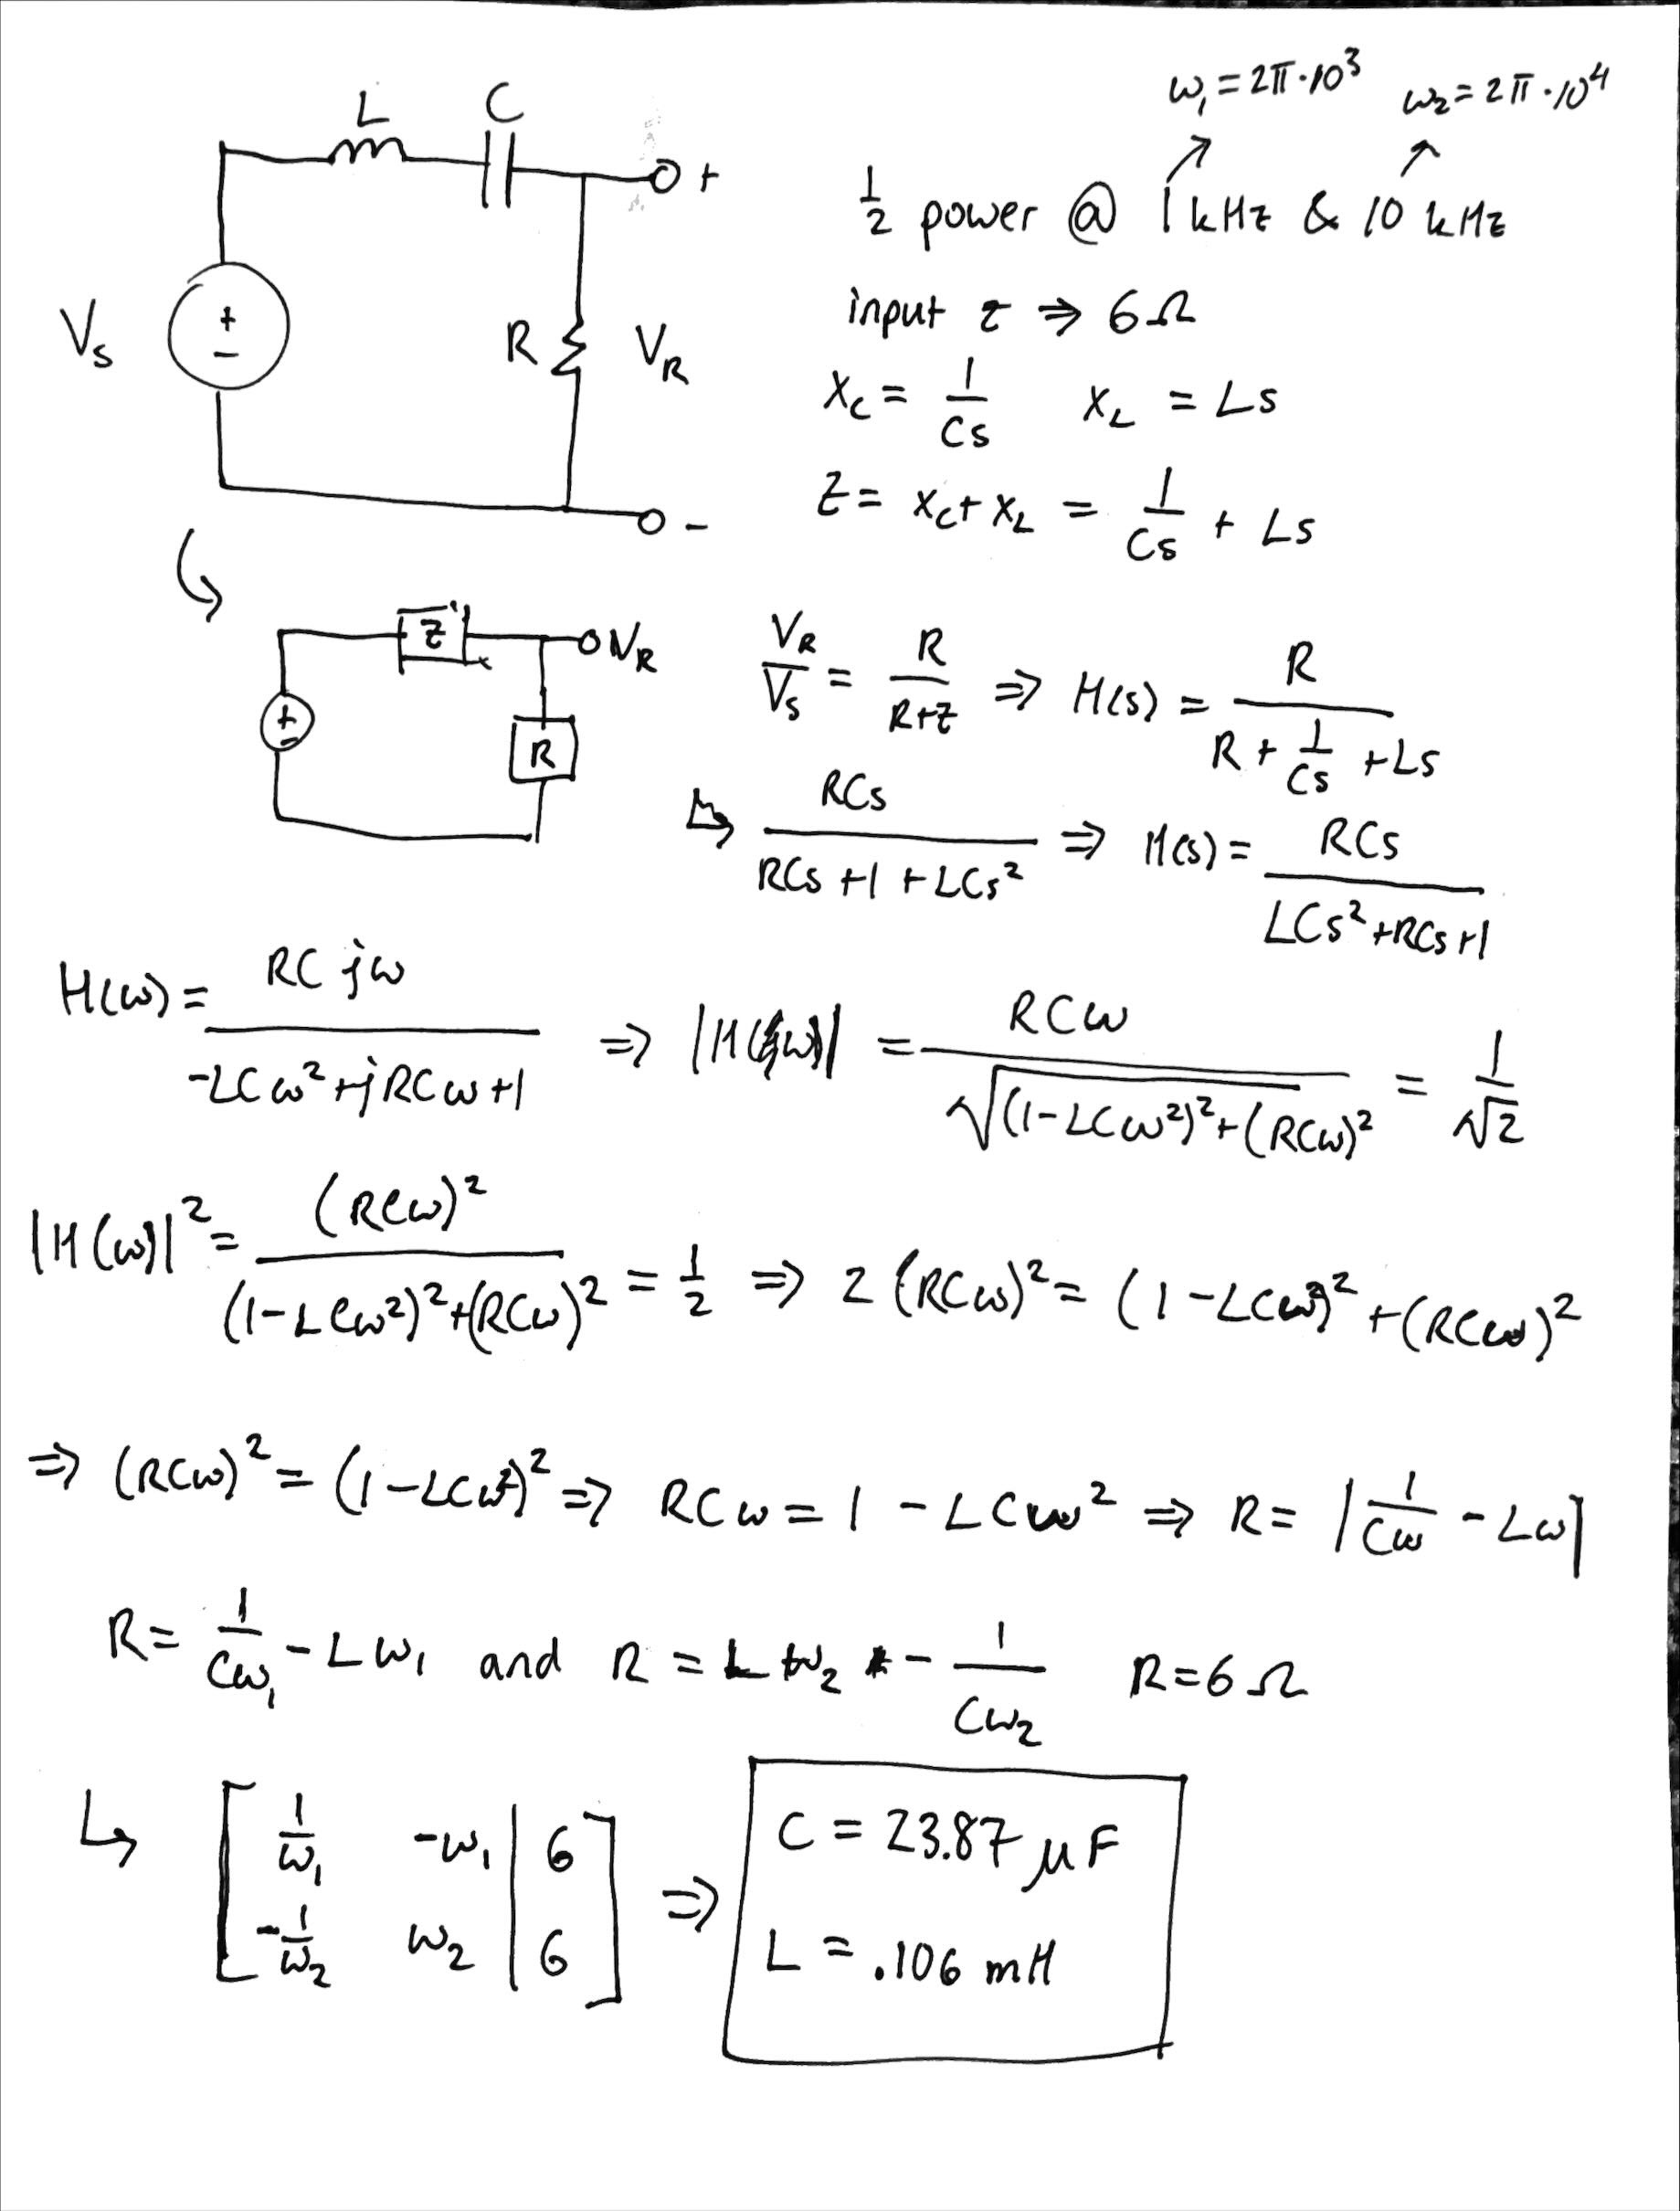

Ans: $R=6\mathrm{~\Omega}$, $L=0.106\mathrm{~mH}$, $C=23.9\mathrm{~\mu F}$.

B. Your colleague has designed an $RLC$ bandpass filter (like that from "A" above) with $R=5\mathrm{~\Omega}$, $L=20\mathrm{~mH}$, and $C=0.5\mathrm{~\mu F}$.

1. Find the filter characteristics: $\omega_0$, $Q$, $B$, $\omega_{c1}$, and $\omega_{c2}$.
2. You're asked to double $Q$ while keeping $\omega_0$ and $R$ the same. If so, what new values of $C$ and $L$ would be required? Show your work.

(Ans: $L=40\mathrm{~mH}$, $C=0.25\mathrm{~\mu F}$)

In [ ]:
R = 5
L = 20e-3
C = .5e-6
omega0 = 1 / np.sqrt(L * C)
Q = omega0 * R / L
B = R / L
omega1 = omega0 * (-1/(2*Q) + np.sqrt(1/(4*Q**2)))
omega2 = omega0 * (1/(2*Q) + np.sqrt(1/(4*Q**2)))

print(f'1.) omega0 = {omega0:.2e} rad/s')
print(f'Q = {Q:.2e}')
print(f'B = {B:.2e}')
print(f'omega1 = {omega1:.2e} rad/s')
print(f'omega2 = {omega2:.2e} rad/s')

L = 2 * L
C = 1 / (omega0**2 * L)
print(f'2.) L = {L*1000} mH')
print(f'C = {C*1e6} uF')

1.) omega0 = 1.00e+04 rad/s
Q = 2.50e+06
B = 2.50e+02
omega1 = 0.00e+00 rad/s
omega2 = 4.00e-03 rad/s
2.) L = 40.0 mH
C = 0.25 uF


C. For the circuit shown below provide the following:
1. An expression for $H(\omega) = V_o/V_i$ in standard form.
2. Spectral plots for the magnitude and phase of $H(\omega)$ given that $R_1 =1\mathrm{~\Omega}$, $R_2 = 2\mathrm{~\Omega}$, $L_1=1\mathrm{~mH}$, and $L_2 =2\mathrm{~mH}$.
3. The cutoff frequency $\omega_c$ and the slope of the magnitude (in dB) when $\omega/\omega_c \ll 1$ and when $\omega/\omega_c \gg 1$.

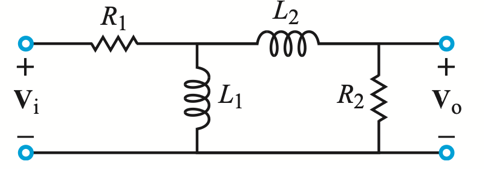

In [ ]:
R1, L1, L2, R2, t = sp.symbols('R1 L1 L2 R2 t', positive=True, real=True)
omega = sp.symbols('omega', positive=True, real=True)
Vi,Vo, V1=sp.symbols('Vi,Vo,V1', real=True)
s = sp.symbols('s')
subsVals = {R1:1, R2:2, L1:sp.Rational(1,int(1e3)), L2:sp.Rational(2, int(1e3))}

f1 = (V1 - Vi) / R1 + V1 / (L1*s) + (V1 - Vo) / (L2*s)
f2 = (Vo - V1) / (L2*s) + Vo / R2
solns = sp.solve([f1, f2], [Vo, V1])
solns

{V1: (L1*L2*Vi*s**2 + L1*R2*Vi*s)/(L1*L2*s**2 + L1*R1*s + L1*R2*s + L2*R1*s + R1*R2),
 Vo: L1*R2*Vi*s/(L1*L2*s**2 + L1*R1*s + L1*R2*s + L2*R1*s + R1*R2)}

In [ ]:
H = solns[Vo] / Vi
#H = H.simplfy()
H = H.subs(s, omega)
print('1.)')
H

1.)


L1*R2*omega/(L1*L2*omega**2 + L1*R1*omega + L1*R2*omega + L2*R1*omega + R1*R2)

In [ ]:
H = sp.simplify(H.subs(subsVals))
H

1000*omega/(omega**2 + 2500*omega + 1000000)

In [ ]:
H.args

(1000, omega, 1/(omega**2 + 2500*omega + 1000000))

In [ ]:
Htf = TransferFunction(H.args[2] * H.args[1], 1/H.args[0], omega)
Htf

TransferFunction(omega/(omega**2 + 2500*omega + 1000000), 1/1000, omega)

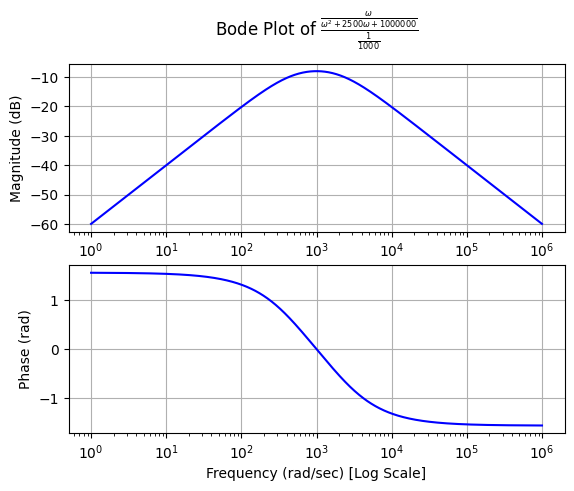

In [ ]:
bode_plot(Htf, initial_exp=0, final_exp=6)

Bode Plot:

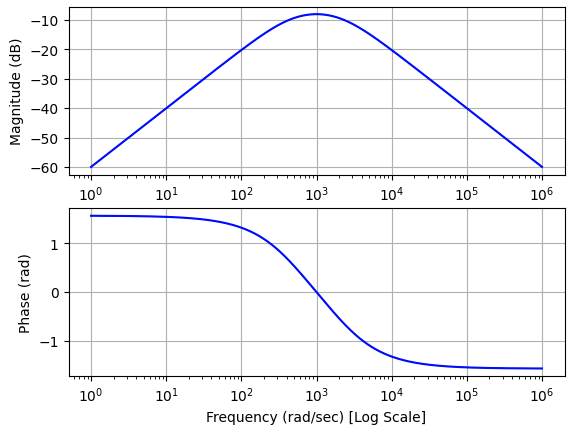

D. For the op-amp circuit below provide the following:
1. An expression for $H(\omega) = V_o/V_i$ in standard form.
2. Spectral plots for the magnitude and phase of $H(\omega)$ given that $R_1 = R_2 = 100\mathrm{~\Omega}$, $C_1 =10\mathrm{\mu F}$, and $C_2= 0.4\mathrm{\mu F}$.
3. What type of filter is it? What is its maximum gain?

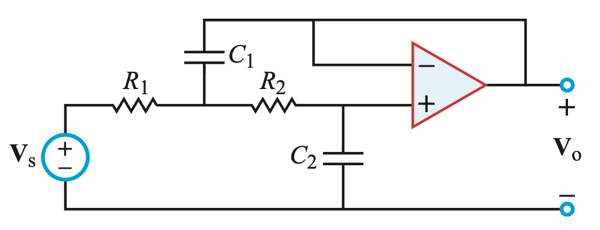

In [ ]:
R1, C1, C2, R2, t = sp.symbols('R1 C1 C2 R2 t', positive=True, real=True)
omega = sp.symbols('omega', positive=True, real=True)
Vi,Vo, V1=sp.symbols('Vi,Vo,V1', real=True)
s = sp.symbols('s')
subsVals = {R1:100, R2:100, C1:sp.Rational(10,int(1e6)), C2:sp.Rational(1, int(4e6))}

f1 = (V1 - Vi) / R1 + (V1 - Vo)*(C1*s) + (V1 - Vo) / R2
f2 = (Vo-V1) / R2 + Vo *(C2*s)
solns = sp.solve([f1, f2], [Vo, V1])
solns

{V1: (C2*R2*Vi*s + Vi)/(C1*C2*R1*R2*s**2 + C2*R1*s + C2*R2*s + 1),
 Vo: Vi/(C1*C2*R1*R2*s**2 + C2*R1*s + C2*R2*s + 1)}

In [ ]:
H = solns[Vo] / Vi
#H = H.simplfy()
H = H.subs(s, omega)
print('1.)')
H

1.)


1/(C1*C2*R1*R2*omega**2 + C2*R1*omega + C2*R2*omega + 1)

In [ ]:
H = sp.simplify(H.subs(subsVals))
H

40000000/(omega**2 + 2000*omega + 40000000)

In [ ]:
H.args

(40000000, 1/(omega**2 + 2000*omega + 40000000))

In [ ]:
Htf = TransferFunction(H.args[0], 1/H.args[1], omega)
Htf

TransferFunction(40000000, omega**2 + 2000*omega + 40000000, omega)

This is a low pass filter, with a max gain of about 7-8 dB.

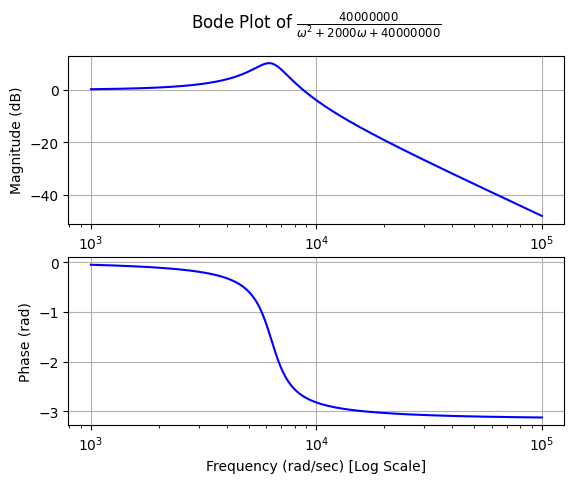

In [ ]:
bode_plot(Htf, initial_exp=3, final_exp=5)

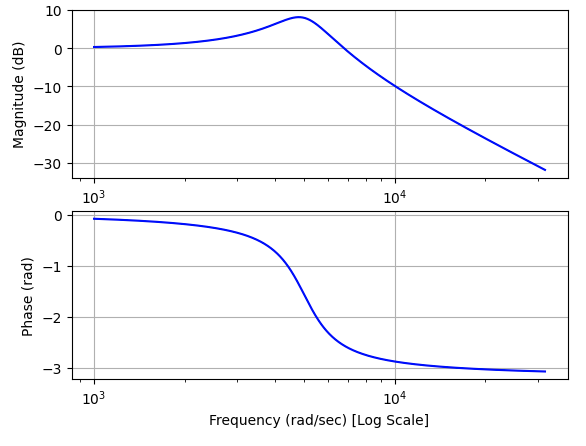

E. For the op-amp circuit below provide the following:

1. An expression for $H(\omega) = V_o/V_i$ in standard form.
2. Spectral plots for the magnitude and phase of $H(\omega)$ given that $R_1 = 1\mathrm{~k\Omega}$, $R_2 = 20\mathrm{~\Omega}$, $C_1 = 5 \mathrm{~\mu F}$, and $C_2 = 25\mathrm{~nF}$.
3. What type of filter is it? What is its maximum gain?

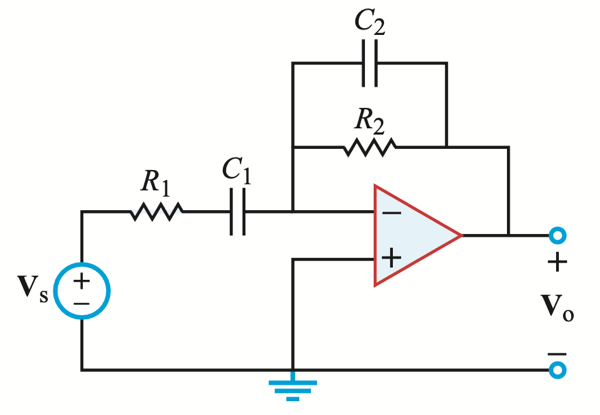

In [ ]:
R1, C1, C2, R2, t = sp.symbols('R1 C1 C2 R2 t', positive=True, real=True)
omega = sp.symbols('omega', positive=True, real=True)
Vi,Vo, V1=sp.symbols('Vi,Vo,V1', real=True)
s = sp.symbols('s')
subsVals = {R1:1000, R2:20, C1:sp.Rational(5,int(1e6)), C2:sp.Rational(25, int(1e9))}
X2 = 1/(s*C2)
Z1 = R1 + (1 /(s*C1))
Z2 = (R2 * X2)/(R2 + X2)
H  = -Z2/Z1

In [ ]:
#H = solns[Vo] / Vi
#H = H.simplfy()

H = H.subs(s, omega)
print('1.)')
H

1.)


-R2/(C2*omega*(R1 + 1/(C1*omega))*(R2 + 1/(C2*omega)))

In [ ]:
H = sp.simplify(H.subs(subsVals))
H

-40000*omega/((omega + 200)*(omega + 2000000))

In [ ]:
H.args

(-40000, omega, 1/(omega + 200), 1/(omega + 2000000))

In [ ]:
Htf = TransferFunction(H.args[1]*H.args[0], 1/H.args[3]*1/H.args[2], omega)
Htf

TransferFunction(-40000*omega, (omega + 200)*(omega + 2000000), omega)

This is a bandpass filter with a max gain of about -35.

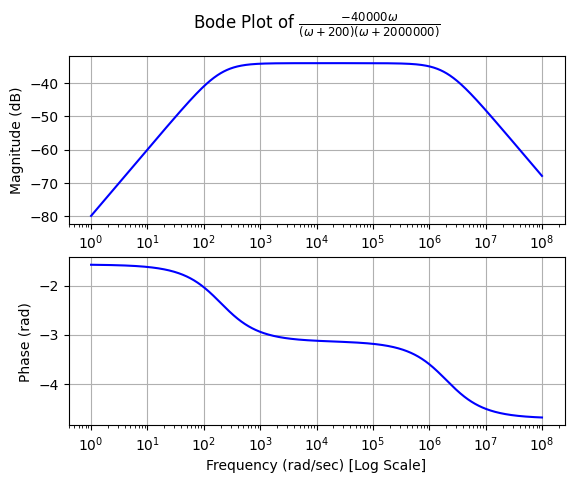

In [ ]:
bode_plot(Htf, initial_exp=0, final_exp=8)

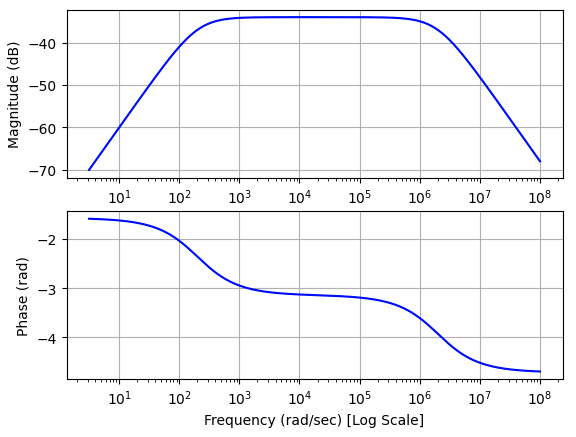